In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene

In [2]:
sns.set_context("talk")
sns.set_theme(style='white')
sns.set_palette('bright')

In [3]:
coef_path = 'output_svm/coefficients_subgenres_ALL_CONCAT.csv'

In [4]:
coefs = pd.read_csv(coef_path)

In [5]:
coefs.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '290.7', '291.7', '292.7', '293.7', '294.7', '295.7', '296.7', '297.7',
       '298.7', '299.7'],
      dtype='object', length=2401)

In [6]:
coefs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
coefs.columns = [['AGENT' for i in range(300)]+['PATIENT' for i in range(300)]+['ADJ' for i in range(300)]+['LOC' for i in range(300)]+['FAC' for i in range(300)]+['GPE' for i in range(300)]+['VEH' for i in range(300)]+['TIME' for i in range(300)]]

In [8]:
coef_index = ['childrenVSmemoirs', 'childrenVSdetective', 'childrenVSadventure', 'childrenVSromance', 'memoirsVSdetective', 'memoirsVSadventure', 'memoirsVSromance', 'detectiveVSadventure', 'detectiveVSromance', 'adventureVSromance']

In [9]:
coefs.index = coef_index

In [21]:
coefs

,AGENT,AGENT,AGENT,AGENT,AGENT,AGENT,AGENT,AGENT,AGENT,AGENT,...,TIME,TIME,TIME,TIME,TIME,TIME,TIME,TIME,TIME,TIME
childrenVSmemoirs,0.001091,-0.003736,0.005015,0.003005,-0.004743,0.003901,0.008900,0.002759,-0.005866,-0.005238,...,0.001161,-0.007724,-0.007737,0.001570,0.000905,-0.009315,-0.008390,0.000937,-0.000178,-0.001183
childrenVSdetective,-0.000343,-0.000407,0.000822,0.006778,0.003188,0.001742,-0.002808,0.005179,0.007095,-0.001693,...,0.003692,-0.006596,0.000255,0.004372,0.005770,-0.003439,-0.005779,-0.001865,0.002263,0.000181
childrenVSadventure,0.004827,-0.000781,0.004145,0.000382,0.005346,-0.006824,-0.002414,0.008329,-0.000513,-0.001029,...,0.004534,-0.006017,0.000348,0.001029,-0.000421,0.000462,0.000350,-0.007692,-0.008221,0.000485
childrenVSromance,-0.005441,0.003632,0.014143,0.000276,0.001454,-0.001571,-0.000746,0.007741,-0.004787,0.004071,...,0.002134,-0.004062,-0.007674,-0.000811,0.006071,0.005410,0.003587,0.001462,0.005064,0.001164
memoirsVSdetective,0.000215,0.000250,-0.002831,0.011358,0.002003,0.000027,-0.009374,-0.001150,0.002472,0.005372,...,-0.000971,-0.004069,0.003625,-0.005718,0.004933,0.004890,0.004848,-0.002850,-0.001165,0.001923
memoirsVSadventure,0.002789,0.004579,-0.000770,0.000111,0.006181,-0.001829,-0.008478,0.001853,0.001982,0.003257,...,-0.000323,0.000610,0.002812,-0.004806,0.000026,0.006884,0.004577,-0.005083,-0.003556,-0.000747
memoirsVSromance,-0.000650,0.001823,0.005730,0.001591,0.002765,0.000247,-0.007768,0.000953,-0.001165,0.006904,...,-0.004227,-0.000343,-0.001918,-0.007517,0.002552,0.007522,0.005481,-0.002534,0.003928,0.000939
detectiveVSadventure,0.002308,0.000647,0.002403,-0.010497,0.003989,-0.007134,0.002601,0.004485,-0.003208,-0.002209,...,-0.000111,0.000567,0.000551,-0.004498,-0.006045,0.003735,0.003427,-0.002128,-0.004855,-0.002336
detectiveVSromance,-0.000503,0.000959,0.012313,-0.006981,-0.001485,-0.000327,0.000444,0.001079,-0.011664,0.003328,...,0.001011,0.002561,-0.004483,-0.004059,0.000813,0.006716,0.003905,0.002518,0.004658,-0.001739
adventureVSromance,-0.002060,0.001432,0.001502,0.002137,-0.001989,0.003495,-0.000705,-0.002310,-0.004439,0.004199,...,0.004138,0.002872,-0.008875,0.000480,0.007199,0.004140,0.000087,0.007473,0.002377,0.001474


In [59]:
def calculate_feature_importance(dataframe):
    facet_columns = ['AGENT', 'PATIENT', 'ADJ', 'LOC', 'FAC', 'GPE', 'VEH', 'TIME']
    feature_importance_facet = {}

    for facet in facet_columns:
        print(facet)
        facet_columns_subset = [column for column in dataframe.columns if facet in column]
        facet_data = dataframe[facet_columns_subset]

        for index, row in facet_data.iterrows():
            print(index)
            pos_type, neg_type = index.split('VS')
            
            pos_facet_data = facet_data[facet_data > 0]
            neg_facet_data = facet_data[facet_data < 0]
        
            pos_facet_mean = pos_facet_data.loc[index].sum() / len(list(pos_facet_data.columns))#pos_facet_data.loc[index].mean()
            neg_facet_mean = neg_facet_data.abs().loc[index].sum() / len(list(neg_facet_data.columns))#neg_facet_data.abs().loc[index].mean()

            #clean_pos = [x for x in list(pos_facet_data.loc[index]) if str(x) != 'nan']
            #clean_neg = [x for x in list(neg_facet_data.abs().loc[index]) if str(x) != 'nan']

            ttest = ttest_ind(pos_facet_data.loc[index], neg_facet_data.abs().loc[index], equal_var=False, nan_policy='omit')
            print(ttest)
            
            feature_importance_facet[facet+'_'+pos_type] = pos_facet_mean
            feature_importance_facet[facet+'_'+neg_type] = neg_facet_mean
    
    df = pd.DataFrame(list(feature_importance_facet.items()), columns=['Feature', 'Value'])

    # Split the 'Feature' column into 'Type' and 'Subgenre'
    df[['Type', 'Subgenre']] = df['Feature'].str.split('_', expand=True)
                
    return df, ttest

In [60]:
feature_importance, ttest = calculate_feature_importance(coefs)

AGENT
childrenVSmemoirs
TtestResult(statistic=4.229016494594393, pvalue=2.349501303950761e-05, df=88664.04804118512)
childrenVSdetective
TtestResult(statistic=11.405850146531847, pvalue=4.100518679406435e-30, df=89914.48673512187)
childrenVSadventure
TtestResult(statistic=-43.45243452300494, pvalue=0.0, df=87766.08289900875)
childrenVSromance
TtestResult(statistic=-21.739765891462376, pvalue=1.6114983234451174e-104, df=89544.48581660389)
memoirsVSdetective
TtestResult(statistic=11.625184154692162, pvalue=3.238145567331827e-31, df=86436.54185458124)
memoirsVSadventure
TtestResult(statistic=-33.39997574868949, pvalue=6.025998430353046e-243, df=81660.27793602853)
memoirsVSromance
TtestResult(statistic=0.2678874608864602, pvalue=0.7887865601471484, df=89939.18441393708)
detectiveVSadventure
TtestResult(statistic=-15.332789664867898, pvalue=5.38970631670516e-53, df=89922.03979125465)
detectiveVSromance
TtestResult(statistic=2.6748177208516277, pvalue=0.007478453364564859, df=83053.142578178

In [61]:
def plot_features(df):
    # Seaborn bar plot with hue
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Type', y='Value', hue='Subgenre', dodge=True)

    plt.xlabel('Type')
    plt.ylabel('Value')
    plt.legend(title='Subgenre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('img/FEATURE_IMPORTANCE_ALL.png', format='png', bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()

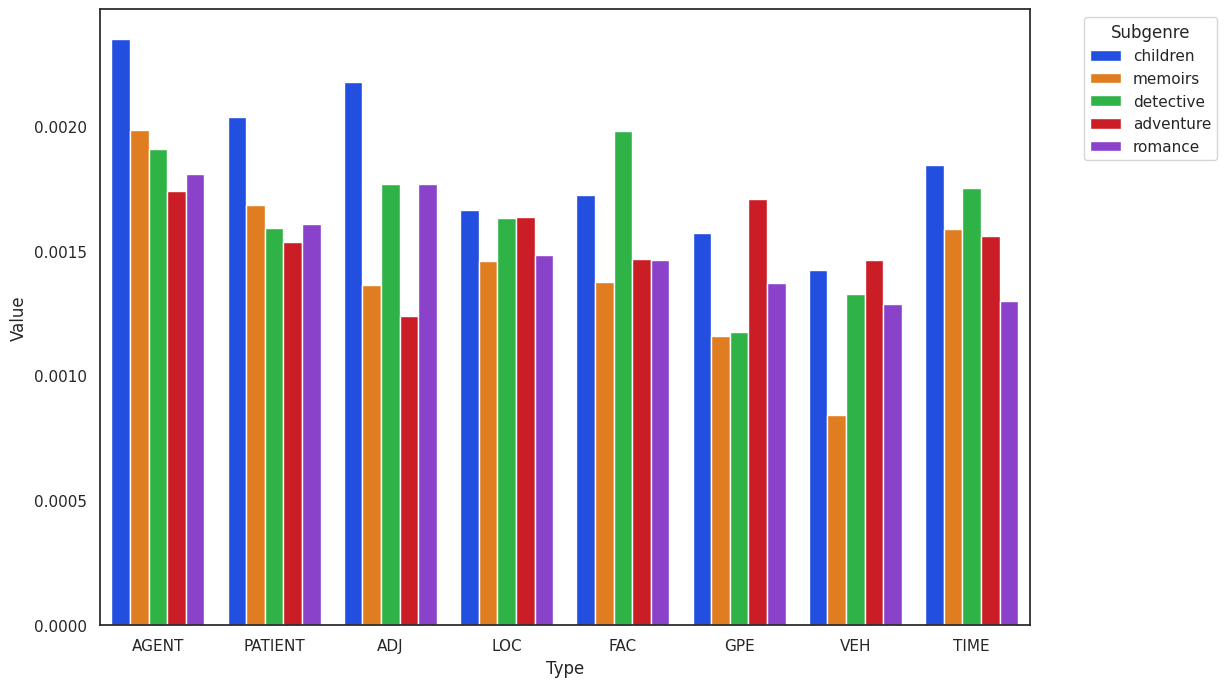

In [62]:
plot_features(feature_importance)

# AVENTURES VS DETECTIVE

In [56]:
desired_row = pd.DataFrame(coefs.loc['detectiveVSadventure']).T

In [57]:
detective_aventures, ttest = calculate_feature_importance(desired_row)

AGENT
detectiveVSadventure
TtestResult(statistic=-15.332789664867898, pvalue=5.38970631670516e-53, df=89922.03979125465)
PATIENT
detectiveVSadventure
TtestResult(statistic=-0.11149066368906099, pvalue=0.9112275184434689, df=89610.79147732939)
ADJ
detectiveVSadventure
TtestResult(statistic=28.70366174930706, pvalue=2.248906319318309e-180, df=89973.96617050386)
LOC
detectiveVSadventure
TtestResult(statistic=19.82938487324595, pvalue=2.6079408212695244e-87, df=85802.43628074585)
FAC
detectiveVSadventure
TtestResult(statistic=17.545424043289106, pvalue=8.40048435706925e-69, df=89887.25056394724)
GPE
detectiveVSadventure
TtestResult(statistic=-21.013536521989558, pvalue=8.487444071032814e-98, df=89913.68280461726)
VEH
detectiveVSadventure
TtestResult(statistic=10.207063584183276, pvalue=1.9023800400111996e-24, df=88039.78692943242)
TIME
detectiveVSadventure
TtestResult(statistic=15.159778411286688, pvalue=7.655634221389653e-52, df=83508.3569322287)


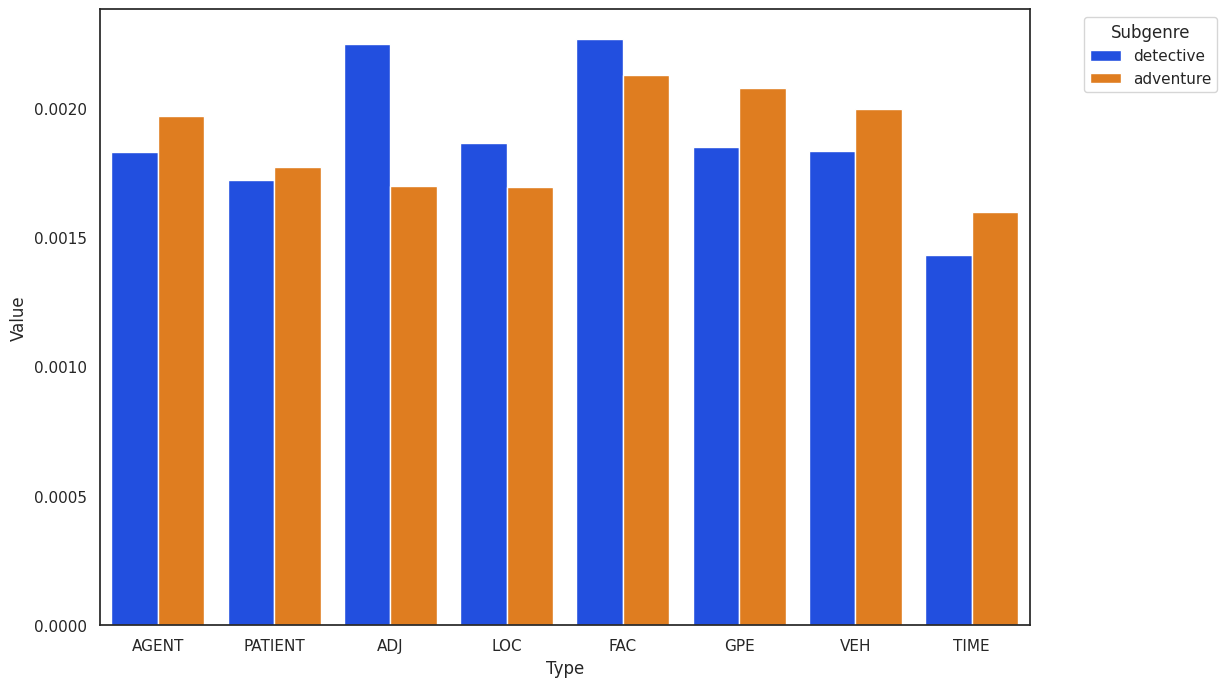

In [30]:
plot_features(detective_aventures)

# ROMANCE VS CHILDREN

In [34]:
desired_row_ro = pd.DataFrame(coefs.loc['childrenVSromance']).T

In [35]:
children_romance, ttest = calculate_feature_importance(desired_row_ro)

AGENT
childrenVSromance
TtestResult(statistic=-21.711459375765195, pvalue=2.9656289831003767e-104, df=89998.0)
PATIENT
childrenVSromance
TtestResult(statistic=-2.492205136705285, pvalue=0.012697053706193282, df=89998.0)
ADJ
childrenVSromance
TtestResult(statistic=-19.365751103922925, pvalue=2.2214362995423312e-83, df=89998.0)
LOC
childrenVSromance
TtestResult(statistic=-19.9849533597594, pvalue=1.1607559347705832e-88, df=89998.0)
FAC
childrenVSromance
TtestResult(statistic=11.73076824181968, pvalue=9.350468029923001e-32, df=89998.0)
GPE
childrenVSromance
TtestResult(statistic=-11.109938044403197, pvalue=1.171647079910712e-28, df=89998.0)
VEH
childrenVSromance
TtestResult(statistic=7.41135706477047, pvalue=1.261033655104427e-13, df=89998.0)
TIME
childrenVSromance
TtestResult(statistic=7.270688419458686, pvalue=3.6055111786161706e-13, df=89998.0)


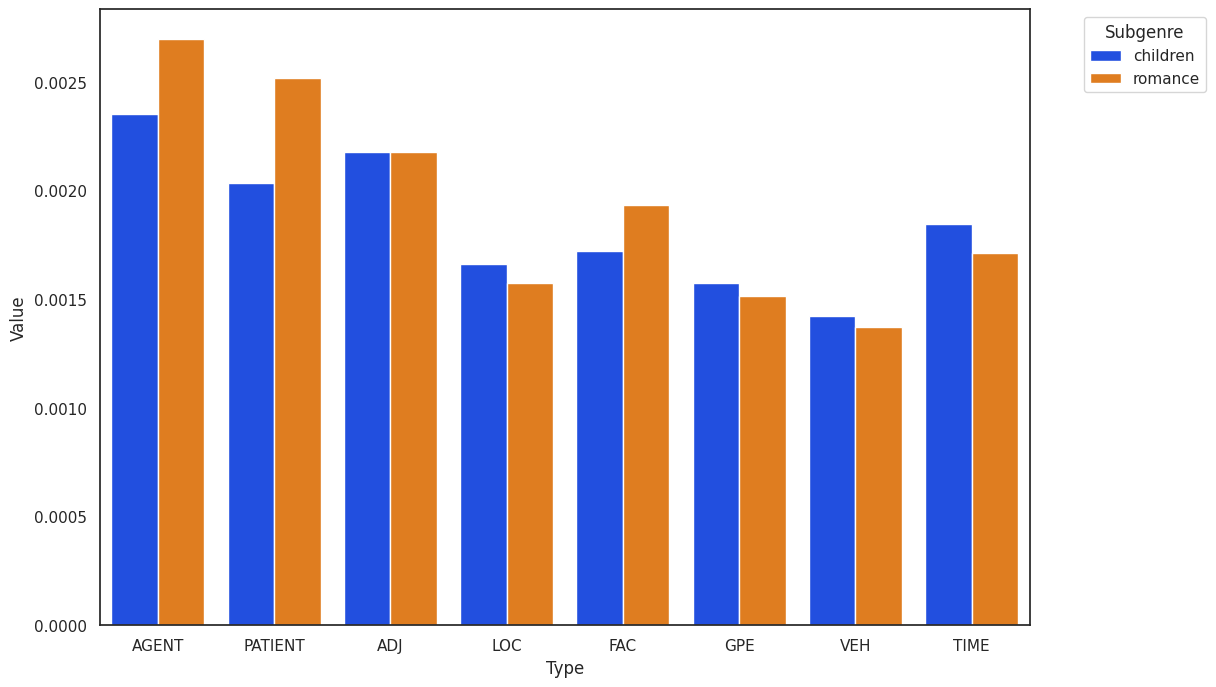

In [33]:
plot_features(children_romance)

In [ ]:
"""
def plot_subgenres(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Subgenre', y='Value', hue='Type', log_scale=True)

    plt.xlabel('Subgenres')
    plt.ylabel('Value')
    plt.legend(title='BookNLP-fr Features', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()
"""